##### Zadanie: przestępczość
1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.
2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).
3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.
4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.
5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

1. Pobierz bazę danych dotyczącą śmiertelnych interwencji policji w USA, a następnie wczytaj ją do obiektu DataFrame.

In [55]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


2. Przekształć tabelę w taki sposób, aby wskazywała zestawienie jednocześnie liczby ofiar interwencji według rasy (‘race’) oraz tego, czy wykazywały one oznaki choroby psychicznej (‘signs_of_mental_illness’).

In [56]:
df['id']=1
dfr = df.pivot_table(values='id', index=['race','signs_of_mental_illness'], aggfunc=len)
dfr

id
race signs_of_mental_illness      
A    False                      69
     True                       24
B    False                    1114
     True                      184
H    False                     745
     True                      157
N    False                      64
     True                       14
O    False                      37
     True                       11
W    False                    1763
     True                      713

3. Za pomocą Map, Applymap lub Apply dodaj do tego zestawienia kolumnę wskazującą jaki odsetek ofiar interwencji wykazywało oznaki choroby psychicznej dla każdej z ras. Odpowiedz, która z nich charakteryzuje się największym odsetkiem znamion choroby psychicznej podczas interwencji.

In [57]:
dfr['percent'] = dfr.groupby(level='race').apply(lambda x: (x / x.sum()).round(2))
dfr.reset_index(inplace=True)
dfr = dfr[(dfr['signs_of_mental_illness']==True)].sort_values(by='percent',ascending=False)
print(dfr)
print(f'Największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzuje się rasa {dfr.iloc[0,0]}.')

   race  signs_of_mental_illness   id  percent
11    W                     True  713     0.29
1     A                     True   24     0.26
9     O                     True   11     0.23
7     N                     True   14     0.18
5     H                     True  157     0.17
3     B                     True  184     0.14
Największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzuje się rasa W.


C:\Users\magda\AppData\Local\Temp\ipykernel_17996\1074013024.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  dfr['percent'] = dfr.groupby(level='race').apply(lambda x: (x / x.sum()).round(2))


4. Dodaj kolumnę oznaczającą dzień tygodnia, w którym doszło do interwencji. Zlicz interwencje według odpowiedniego dnia tygodnia. Następnie stwórz wykres kolumnowy, tak aby dni tygodnia były uszeregowane od poniedziałku do niedzieli.

In [58]:
df['date'] = pd.to_datetime(df['date'])
dfd_dic = dict(zip(df['date'],df['date'].dt.day_name()))
df['week_day'] = df['date'].map(dfd_dic)

In [59]:
sort=[ 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dfch=df.groupby('week_day').agg({'id':'sum'}).reindex(sort)
print(dfch)


            id
week_day      
Monday     726
Tuesday    816
Wednesday  829
Thursday   810
Friday     761
Saturday   721
Sunday     753


<AxesSubplot: xlabel='week_day'>

<Figure size 640x480 with 0 Axes>

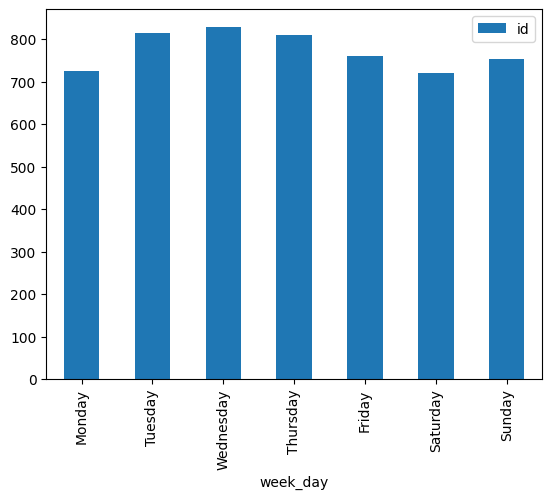

In [60]:
plt.figure()
dfch.plot(kind="bar")

5. Wczytaj do projektu dane dotyczące populacji w poszczególnych stanach USA oraz dane dotyczące skrótów poszczególnych stanów. Połącz te bazy danych w taki sposób, aby móc policzyć do ilu incydentów w bazie dotyczącej śmiertelnych interwencji doszło w przeliczeniu na 1000 mieszkańców każdego ze stanów.

In [61]:
dfpop = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population',header=0)
dfpop = dfpop[0]
dfpop.rename(columns={'State':'state','Population estimate, July 1, 2019 [2]':'population'}, inplace=True)
dfpop.drop(['Rank in states & territories, 2019',	'Rank in states & territories, 2010',	'Census population, April 1, 2010 [3]',	
'Percent change, 2010–2019 [note 1]',	'Absolute change, 2010-2019', 'Total seats in the U.S. House of Representatives, 2013–2023',	
'Estimated population per electoral vote, 2019 [note 2]',	'Estimated population per House seat, 2019',	
'Census population per House seat, 2010',	'Percent of the total U.S. population, 2018 [note 3]'], axis=1, inplace=True)
dfpop[:5]

,state,population
0,California,39512223
1,Texas,28995881
2,New York,21477737
3,Florida,19453561
4,Illinois,12801989


In [62]:
dfabr = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations', header=2)
dfabr = dfabr[0]
dfabr.rename(columns={'ISO':'state','Unnamed: 3':'ansi'}, inplace=True)
dfabr.drop(['ISO 3166 codes (2-letter, 3-letter, and 3-digit codes from ISO 3166-1; 2+2-letter codes from ISO 3166-2)',
'Unnamed: 4','Unnamed: 2','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1, inplace=True)
dfabr.drop(np.arange(0,8),inplace=True)


In [63]:
df.rename(columns={'state':'ansi'}, inplace=True)
df = pd.merge(df,dfabr,how='inner', on='ansi')

In [64]:
df = pd.merge(df,dfpop, how='inner', on='state')

In [65]:
df = df.pivot_table(values='id',index=['state','population'], aggfunc=np.sum)
# dfp['inter_per_1000_people'] = dfp.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
df.reset_index(inplace=True)

In [66]:
def i_people(row):
    people=(row['id']*1000)/(row['population'])
    return people
df['id_per_1000_people']=df.apply(lambda row: i_people(row), axis=1).round(3)
df

,state,population,id,id_per_1000_people
0,Alabama,4903185,104,0.021
1,Alaska,731545,39,0.053
2,Arizona,7278717,254,0.035
3,Arkansas,3017825,83,0.028
4,California,39512223,799,0.020
5,Colorado,5758736,195,0.034
6,Connecticut,3565287,21,0.006
7,Delaware,973764,13,0.013
8,District of Columbia,705749,13,0.018
9,Florida,19453561,350,0.018
